In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
file_path = '/content/drive/My Drive/dataset/laptop.csv'
df = pd.read_csv(file_path)
print(df.shape)
df.head()

(920, 12)


,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen 5 5600H/ 8GB/ 512GB SSD/ Win11/ 4GB Graph),"₹50,399",70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty
1,1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8GB/ 512GB SSD/ Win11 Home),"₹23,990",56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty
2,2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 7320U/ 8GB/ 512GB SSD/ Win11 Home),"₹26,989",55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11),"₹69,990",60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
4,4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Gen Core i9/ 16GB/ 1TB SSD/ Win11 Home/ RTX 4060),"₹1,02,990",78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty


In [ ]:
#Convert rupee price to sgd
df['price_sgd'] = df['Price'].str.replace(r'\D','',regex=True).astype('float')*0.015
df.head()

,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,price_sgd
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen 5 5600H/ 8GB/ 512GB SSD/ Win11/ 4GB Graph),"₹50,399",70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,755.985
1,1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8GB/ 512GB SSD/ Win11 Home),"₹23,990",56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,359.850
2,2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 7320U/ 8GB/ 512GB SSD/ Win11 Home),"₹26,989",55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,404.835
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen Core i5/ 16GB/ 512GB SSD/ Win11),"₹69,990",60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,1049.850
4,4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Gen Core i9/ 16GB/ 1TB SSD/ Win11 Home/ RTX 4060),"₹1,02,990",78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,1544.850


In [ ]:
# 1) generation: get gen, intel/amd, i3/5/7/9
# 2) core: get core
# 3) ram: get no. GB
# 4) ssd: get gb/tb
# 5) display: get inches
# 6) warranty: get 1-3yr warranty
df['Generation'].value_counts().head(50)


,count
Generation,
12th Gen Intel Core i5 1235U,48
12th Gen Intel Core i3 1215U,45
12th Gen Intel Core i5 12450H,40
13th Gen Intel Core i5 1335U,39
11th Gen Intel Core i3 1115G4,26
13th Gen Intel Core i7 1355U,24
13th Gen Intel Core i7 13700H,23
13th Gen Intel Core i5 13420H,22
12th Gen Intel Core i7 12650H,22


In [ ]:
pd.set_option('display.max_columns', None)
df2=df.copy()
# 1) generation: get gen, intel/amd, i3/5/7/9
df2['Generation Number'] = df2['Generation'].str[:8]
df2['Generation Number'] = df2['Generation Number'].str.extract(r'(\d+)')
df2['Ryzen / Intel'] = df2['Generation'].apply(lambda x: 'Intel' if 'Intel' in x else 'Ryzen')
df2['Intel i'] = df2['Generation'].str.extract(r'(i\d+)')

display(df2['Ryzen / Intel'].value_counts())
display(df2['Intel i'].value_counts())


,count
Ryzen / Intel,
Intel,672
Ryzen,248


,count
Intel i,
i5,282
i7,156
i3,105
i9,47


In [ ]:
# 2) core: get core
df2['No. Cores']=df2['Core'].replace({'Hexa': '6', 'Octa': '8', 'Quad': '4', 'Dual': '2','Cores':'Core'},regex=True).str.split(',').str[0]
df2['No. Cores'] = df2['No. Cores'].apply(lambda x: '' if 'Core' not in x else x)
df2['No. Cores'] = df2['No. Cores'].str[:7].str[:2]
df2['No. Cores'] = df2['No. Cores'].replace('',0)
df2['No. Cores'] = df2['No. Cores'].astype('int')
df2['No. Cores'].value_counts()

,count
No. Cores,
10,179
8,178
6,165
4,95
14,75
12,74
2,70
16,40
24,23


In [ ]:
# 3) ram: get no. GB
df2['Ram (No. GB)'] = df2['Ram'].str[:6]
df2['Ram (No. GB)'] = df2['Ram (No. GB)'].apply(lambda x: 0 if 'GB' not in x else x)
df2['Ram (No. GB)']=df2['Ram (No. GB)'].str.extract(r'(\d+)')
df2['Ram (No. GB)'].value_counts()

,count
Ram (No. GB),
16,512
8,308
32,61
4,17
64,6
36,3
18,3
12,2
512,2


In [ ]:
# 4) ssd: get gb/tb
df2['SSD (No. GB)'] = df2['SSD'].str[:6]
df2['SSD (No. GB)'] = df2['SSD (No. GB)'].str.strip()
df2['SSD (No. GB)'] = df2['SSD (No. GB)'].replace({'1 TB':'1000 GB','2 TB':'2000 GB'},regex=True)
df2['SSD (No. GB)'].value_counts()

,count
SSD (No. GB),
512 GB,619
1 TB S,216
256 GB,36
2 TB S,17
128 GB,12
64 GB,6
1 TB H,5
8 GB N,2
16 GB,1


In [ ]:
df2['Inches'] = df2['Display'].str[:11]
df2['Inches'] = df2['Inches'].str.extract(r'(\d+)')
df2['Inches'].value_counts()


,count
Inches,
15,447
14,224
16,161
13,32
17,30
11,13
4,5
12,4
1,1


In [ ]:
df2['Warranty(Years)'] = df2['Warranty'].apply(lambda x: x if isinstance(x, str) and "Year" in x else "None")
df2['Warranty(Years)'] = df2['Warranty'].apply(lambda x: x[:1] if isinstance(x, str) and "Year" in x else 0)
df2['Warranty(Years)'] = df2['Warranty(Years)'].astype(int)
df2['Warranty(Years)'].value_counts()

,count
Warranty(Years),
1,806
2,74
0,24
3,16


In [ ]:
df_final = df2[['Generation Number', 'Ryzen / Intel', 'Intel i', 'No. Cores', 'Ram (No. GB)','SSD (No. GB)','Inches','Warranty(Years)','price_sgd']]
df_final

,Generation Number,Ryzen / Intel,Intel i,No. Cores,Ram (No. GB),SSD (No. GB),Inches,Warranty(Years),price_sgd
0,5,Ryzen,NaN,6,8,512 GB,15,1,755.985
1,11,Intel,i3,2,8,512 GB,15,1,359.850
2,7,Ryzen,NaN,4,8,512 GB,15,1,404.835
3,12,Intel,i5,12,16,512 GB,13,1,1049.850
4,14,Intel,i9,24,16,1 TB S,16,1,1544.850
...,...,...,...,...,...,...,...,...,...
915,12,Intel,i5,8,16,512 GB,16,1,974.850
916,7,Ryzen,NaN,8,16,1 TB S,15,1,2324.850
917,13,Intel,i7,10,8,512 GB,14,1,1049.850
918,11,Intel,i5,4,16,512 GB,15,1,823.500


In [ ]:
df_final.dtypes

,0
Generation Number,object
Ryzen / Intel,object
Intel i,object
No. Cores,int64
Ram (No. GB),object
SSD (No. GB),object
Inches,object
Warranty(Years),int64
price_sgd,float64


array([[1.        , 0.74933643],
       [0.74933643, 1.        ]])

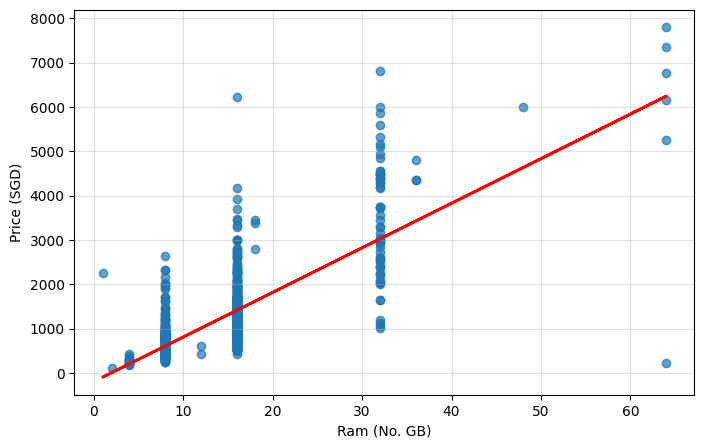

In [ ]:
df_plot = df_final[['Ram (No. GB)','price_sgd']].copy()
df_plot.dropna(inplace=True)
df_plot['Ram (No. GB)']=df_plot['Ram (No. GB)'].astype(int)
df_plot = df_plot[df_plot['Ram (No. GB)']<100] #outliers detected; 2 data points more than500GB


import matplotlib.pyplot as plt
import numpy as np

x = df_plot['Ram (No. GB)']
y = df_plot['price_sgd']

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.7)

# ---- Add Trendline ----
m, b = np.polyfit(x, y, 1)      # slope (m) and intercept (b)
plt.plot(x, m*x + b, color='red', linewidth=2)
plt.xlabel('Ram (No. GB)')
plt.ylabel('Price (SGD)')
plt.grid(True, linestyle='-', alpha=0.4)
np.corrcoef(x, y)


[[1.        0.6698457]
 [0.6698457 1.       ]]


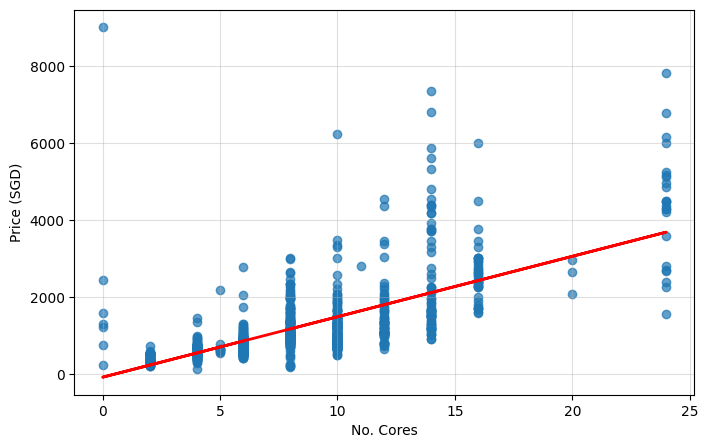

In [ ]:
df_plot = df_final[['No. Cores','price_sgd']].copy()
df_plot.dropna(inplace=True)
df_plot['No. Cores']=df_plot['No. Cores'].astype(int)

import matplotlib.pyplot as plt
import numpy as np

x = df_plot['No. Cores']
y = df_plot['price_sgd']

plt.figure(figsize=(8,5))
plt.scatter(x, y, alpha=0.7)

# ---- Add Trendline ----
m, b = np.polyfit(x, y, 1)      # slope (m) and intercept (b)
plt.plot(x, m*x + b, color='red', linewidth=2)
plt.xlabel('No. Cores')
plt.ylabel('Price (SGD)')
plt.grid(True, linestyle='-', alpha=0.4)
print(np.corrcoef(x, y))

In [ ]:
# Conclusion: Ram and Cores generally have a strong correlation to the laptop price